In [1]:
# Import all necessary libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **Data Source:**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features).

We will use the dataset ``TelecomCustomerChurn.csv`` downloaded from Kaggle throughout this project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data
telecom_cust = pd.read_csv('/content/drive/MyDrive/CS345/dataset/TelecomCustomerChurn.csv')

## Looking at the data

In [4]:
# First five rows of data
telecom_cust.head()                      

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# The dimensionality of data
print("Shape of data: {}".format(telecom_cust.shape))

Shape of data: (7043, 21)


In [6]:
# All the columns
print("Feature names: \n{}".format(telecom_cust.columns.values)) 

Feature names: 
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


## Visualizing the distribution of individual variables

### Demographics 

#### Gender

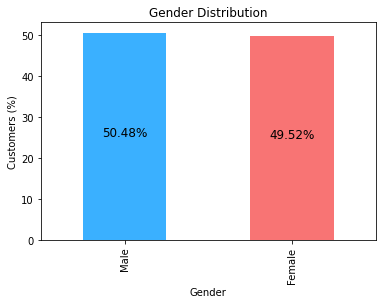

In [7]:
colors = ['#3AB0FF', '#F87474']
gender_percent = telecom_cust['gender'].value_counts()*100.0/len(telecom_cust)

ax = (telecom_cust['gender'].value_counts()*100.0/len(telecom_cust)).plot(kind = 'bar', color = colors)
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Customers (%)')

# set bar labels
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(gender_percent[i]), (x, y), ha = 'center', fontsize = 12, color = 'black')

plt.show()

About half of the customers are male and the other half are female.

#### Senior Citizen

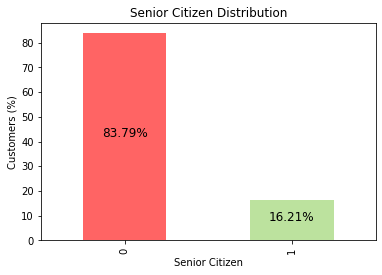

In [8]:
colors = ['#FF6464', '#BCE29E']
SeniorCitizen_percent = telecom_cust['SeniorCitizen'].value_counts()*100.0/len(telecom_cust)

ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0/len(telecom_cust)).plot(kind = 'bar', color = colors)
ax.set_title('Senior Citizen Distribution')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Customers (%)')

# set bar labels
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(SeniorCitizen_percent[i]), (x, y), ha = 'center', fontsize = 12, color = 'black')

plt.show()

Only about 16% of the customers are senior citizens. Thus most of the customers are young people.

#### Partner and Dependent

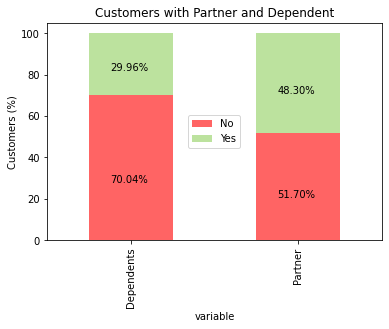

In [9]:
df1 = pd.melt(telecom_cust, id_vars = ['customerID'], value_vars = ['Partner', 'Dependents'])
df2 = df1.groupby(['variable', 'value']).count().unstack()
df3 = df2*100/len(telecom_cust)
colors = ['#FF6464', '#BCE29E']

ax = df3.loc[:, 'customerID'].plot.bar(stacked = True, color = colors)
ax.set_title('Customers with Partner and Dependent')
ax.set_ylabel('Customers (%)')
ax.legend(loc = 'center')

# set bar labels
for p in ax.patches: 
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate('{:.2f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color = 'black')

Only about half of customers have a dependent, while the other half do not. 

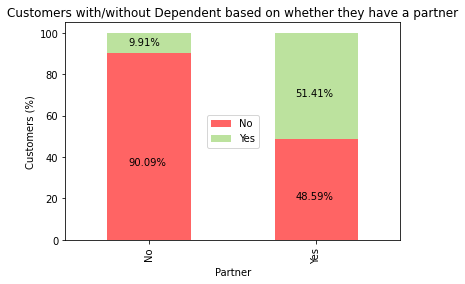

In [10]:
partner_dependent = telecom_cust.groupby(['Partner', 'Dependents']).size().unstack()
colors = ['#FF6464', '#BCE29E']

ax = (partner_dependent.T*100.0/partner_dependent.T.sum()).T.plot(kind = 'bar', stacked = True, color = colors)
ax.set_title('Customers with/without Dependent based on whether they have a partner')
ax.set_ylabel('Customers (%)')
ax.legend(loc = 'center')

# set bar labels
for p in ax.patches: 
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate('{:.2f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color = 'black')

Among the customers who do not have any partners, most of them also do not have any dependents.

### Customers Account Information

#### Tenure

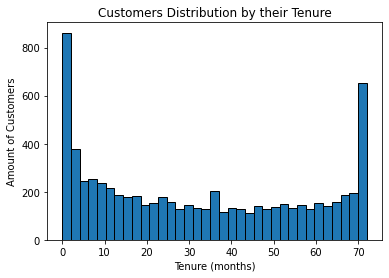

In [11]:
# ax = sns.distplot
plt.hist(telecom_cust['tenure'], bins = 35, edgecolor='black')
plt.title('Customers Distribution by their Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Amount of Customers')

plt.show()

Most of the customers have been with the company for just a month, while quite many for about 72 months. 

#### Contract

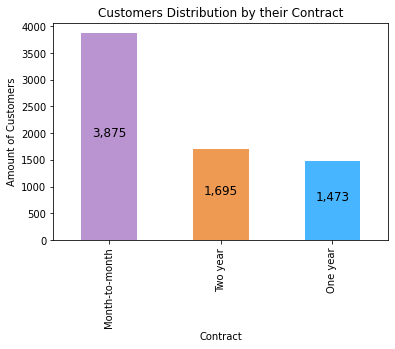

In [12]:
colors = ['#BA94D1', '#EF9A53', '#47B5FF']
contract_num = telecom_cust['Contract'].value_counts()

ax = (telecom_cust['Contract'].value_counts()).plot(kind = 'bar', color = colors)
ax.set_title('Customers Distribution by their Contract')
ax.set_xlabel('Contract')
ax.set_ylabel('Amount of Customers')

# set bar labels
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate(str("{:,}".format(list(contract_num)[i])), (x, y), ha = 'center', fontsize = 12, color = 'black')

plt.show()

Most of the customers are in the month-to-month contract, while 1 year and 2 year contracts have almost the same number of customers.

#### Tenure and Contract

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Tenure (months)')

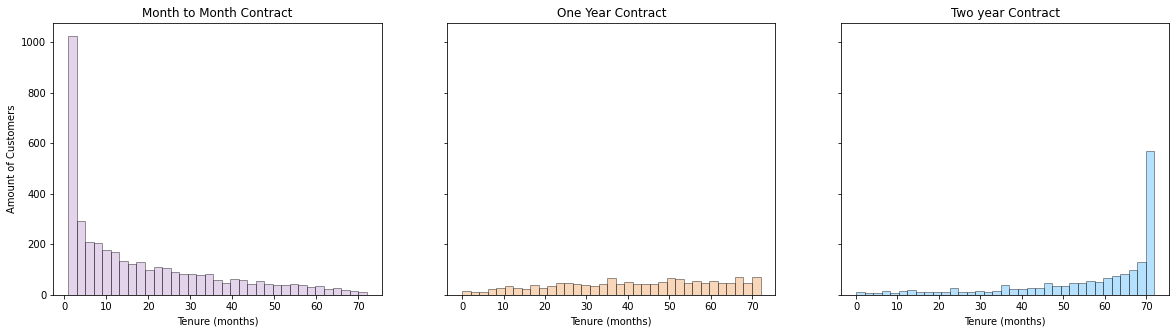

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5), sharey = True)

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                  hist = True, kde = False, bins = 35, color = '#BA94D1',
                  hist_kws = {'edgecolor': 'black'}, ax = ax1)
ax.set_title('Month to Month Contract')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Amount of Customers')

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                  hist = True, kde = False, bins = 35, color = '#EF9A53',
                  hist_kws = {'edgecolor': 'black'}, ax = ax2)
ax.set_title('One Year Contract')
ax.set_xlabel('Tenure (months)')

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                  hist = True, kde = False, bins = 35, color = '#47B5FF',
                  hist_kws = {'edgecolor': 'black'}, ax = ax3)

ax.set_title('Two year Contract')
ax.set_xlabel('Tenure (months)')

Most of the monthly contracts last for 1-2 months, while the 2-year contracts tend to last for 70 months. This shows that the customers who take a long contract are more loyal to the company and tend to stay with it for a longer period of time.

### Services 

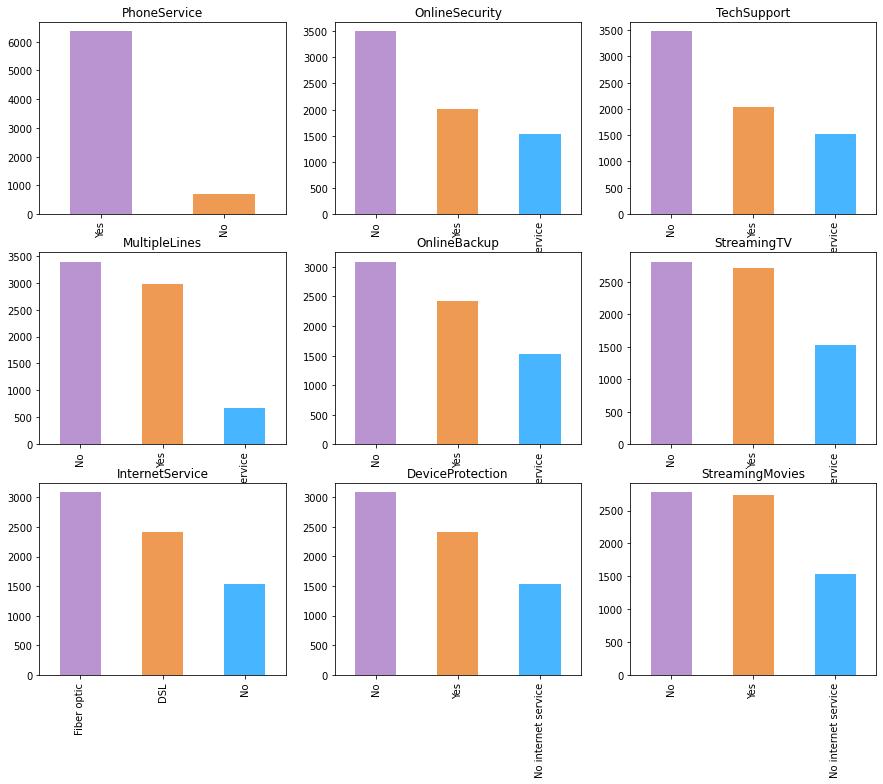

In [14]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
colors = ['#BA94D1', '#EF9A53', '#47B5FF']

fig, axes = plt.subplots(3, 3, figsize = (15, 12))

for i, service in enumerate(services):
  if i < 3:
    ax = telecom_cust[service].value_counts().plot(kind = 'bar', ax = axes[i, 0], color = colors)

  elif i >= 3 and i < 6:
    ax = telecom_cust[service].value_counts().plot(kind = 'bar', ax = axes[i - 3, 1], color = colors)

  elif i < 9:
    ax = telecom_cust[service].value_counts().plot(kind = 'bar', ax = axes[i - 6, 2], color = colors) 

  ax.set_title(service)   

### Monthly Charges and Total Charges

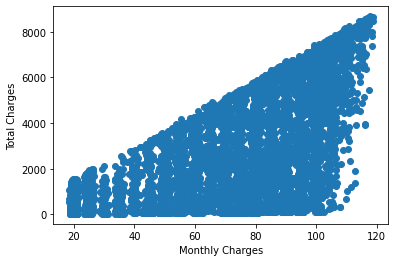

In [15]:
x = telecom_cust['MonthlyCharges']
y = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

plt.scatter(x, y)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

plt.show()

The total charges increase as the monthly charge for the customer increase.

### Payment Method

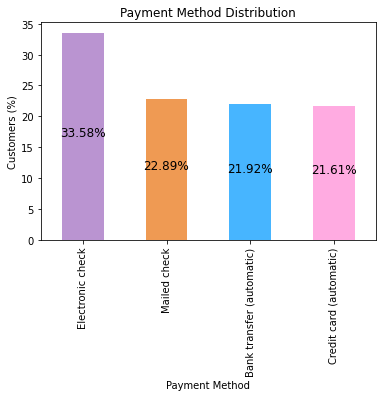

In [16]:
colors = ['#BA94D1', '#EF9A53', '#47B5FF', '#FFABE1']
payment_percent = telecom_cust['PaymentMethod'].value_counts()*100.0/len(telecom_cust)

ax = (telecom_cust['PaymentMethod'].value_counts()*100.0/len(telecom_cust)).plot(kind = 'bar', color = colors)
ax.set_title('Payment Method Distribution')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Customers (%)')

# set bar labels
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(payment_percent[i]), (x, y), ha = 'center', fontsize = 12, color = 'black')

plt.show()

Most customers use electronic checks for payment.

### Churn

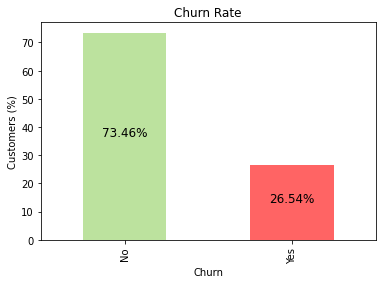

In [17]:
colors = ['#BCE29E', '#FF6464']
churn_percent = telecom_cust['Churn'].value_counts()*100.0/len(telecom_cust)

ax = (telecom_cust['Churn'].value_counts()*100.0/len(telecom_cust)).plot(kind = 'bar', color = colors)
ax.set_title('Churn Rate')
ax.set_xlabel('Churn')
ax.set_ylabel('Customers (%)')

# set bar labels
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(churn_percent[i]), (x, y), ha = 'center', fontsize = 12, color = 'black')

plt.show()

About 73% of the customers do not churn.

#### Churn by Seniority

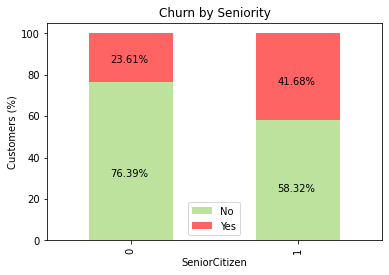

In [18]:
colors = ['#BCE29E', '#FF6464']
senior_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (senior_churn.T*100.0/senior_churn.T.sum()).T.plot(kind = 'bar', stacked = True, color = colors)
ax.set_title('Churn by Seniority')
ax.set_ylabel('Customers (%)')
ax.legend(loc = 'best')

# set bar labels
for p in ax.patches: 
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate('{:.2f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color = 'black')

Senior citizen have almost double churn rate than young people.

#### Churn by Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


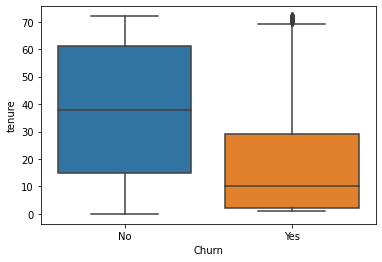

In [19]:
sns.boxplot(telecom_cust['Churn'], telecom_cust['tenure'])

The customers who do not churn tend to stay for a longer tenure with the company

#### Churn by Contract

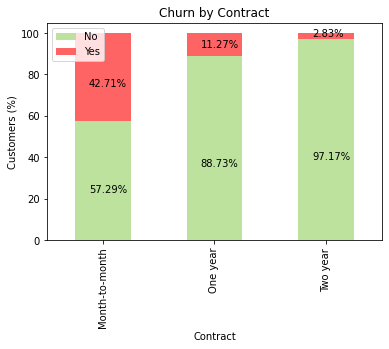

In [20]:
colors = ['#BCE29E', '#FF6464']
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

ax = (contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind = 'bar', stacked = True, color = colors)
ax.set_title('Churn by Contract')
ax.set_ylabel('Customers (%)')
ax.legend(loc = 'best')

# set bar labels
for p in ax.patches: 
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate('{:.2f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color = 'black')

The customers who have a month-to-month contract have a very high churn rate.

#### Churn by Monthly Charges and Total Charges

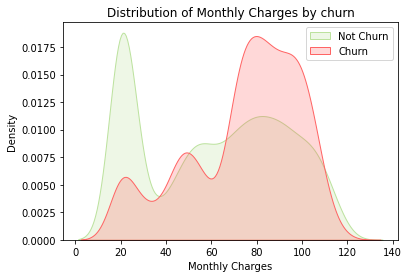

In [21]:
ax = sns.kdeplot(telecom_cust['MonthlyCharges'][(telecom_cust['Churn'] == 'No') ], color = "#BCE29E", shade = True)
ax = sns.kdeplot(telecom_cust['MonthlyCharges'][(telecom_cust['Churn'] == 'Yes') ], ax = ax, color = "#FF6464", shade= True)
ax.set_title('Distribution of Monthly Charges by churn')
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.legend(['Not Churn', 'Churn'], loc = 'upper right')

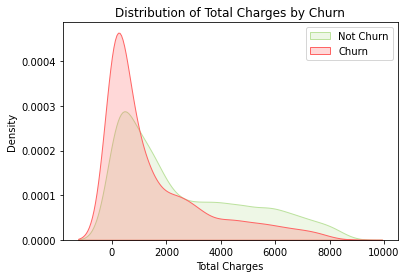

In [22]:
x = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

ax = sns.kdeplot(x[(telecom_cust['Churn'] == 'No') ], color = "#BCE29E", shade = True)
ax = sns.kdeplot(x[(telecom_cust['Churn'] == 'Yes') ], ax = ax, color= "#FF6464", shade = True)
ax.set_title('Distribution of Total Charges by Churn')
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.legend(['Not Churn', 'Churn'], loc='upper right')

Higher customers churn when monthly charges are high, But in total charges, higher churn when the total charges are lower.

# **Data Preparation:**

## Explore the data

In [23]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
# Converting Total Charges to a numerical data type
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
# Check whether any null value exists
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, there are 11 missing values for Total Charges

## Data Cleansing

In [26]:
# Removing missing values 
telecom_cust.dropna(inplace = True)

# Removing unnecessary columns
telecom_cust.drop(['customerID'], axis = 1, inplace = True)

print("Shape after dropping: {}".format(telecom_cust.shape))

Shape after dropping: (7032, 20)


## Data Transformation

In [27]:
# Converting the predictor label into binary numeric variables (0 and 1)
telecom_cust['Churn'].replace(to_replace = 'No', value = 0, inplace = True)
telecom_cust['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
telecom_cust['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [28]:
# Converting the categorical features into dummy variables
telecom_cust_dummies = pd.get_dummies(telecom_cust)
telecom_cust_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Feature Selection - ปัจจัยที่ส่งผลต่อการเลิกใช้บริการของลูกค้า

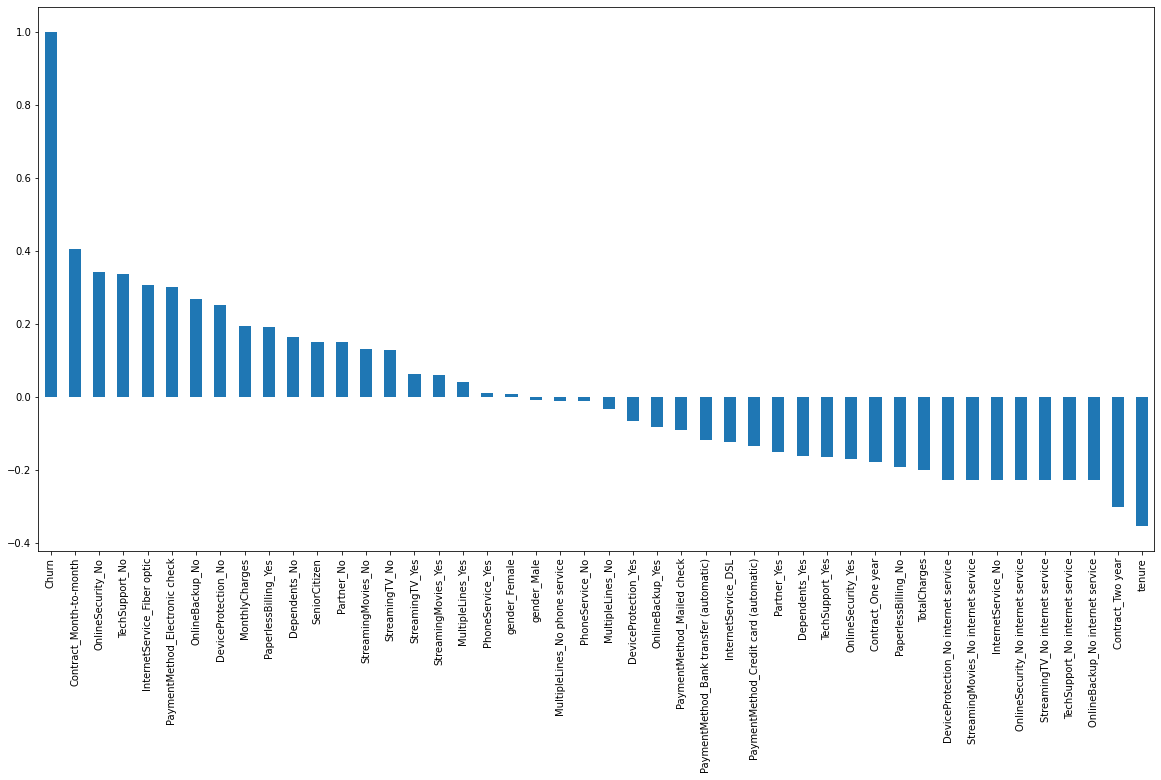

In [29]:
# Plotting the correlation of Churn with other features
plt.figure(figsize = (20, 10))
telecom_cust_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Month-to-month contracts, a lack of online security, and technical support appear to be positively related to churn. While tenure and two-year contracts appear to be negatively correlated.

It's interesting to note that churn appears to be adversely correlated with services like online backup, tech support, streaming TV, etc. that don't require an internet connection. 

# **Data Representation:**

In [30]:
X_telecom_cust, y_telecom_cust = telecom_cust_dummies.drop('Churn', axis = 1), telecom_cust_dummies['Churn']

In [31]:
# Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_telecom_cust, y_telecom_cust, random_state = 0)

In [32]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape)) 

X_train shape: (5274, 45)
y_train shape: (5274,)


In [33]:
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape)) 

X_test shape: (1758, 45)
y_test shape: (1758,)


# **Modeling:**

## Baseline Models

We will apply LazyClassifier and compare every model based on the Accuracy of each model.

In [34]:
!pip3 install -U lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:27<00:00,  1.07it/s]


In [36]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.75     0.75      0.73   
BernoulliNB                        0.73               0.75     0.75      0.74   
GaussianNB                         0.70               0.75     0.75      0.72   
LogisticRegression                 0.81               0.73     0.73      0.81   
LinearSVC                          0.81               0.72     0.72      0.80   
LinearDiscriminantAnalysis         0.80               0.72     0.72      0.80   
CalibratedClassifierCV             0.81               0.72     0.72      0.80   
AdaBoostClassifier                 0.81               0.72     0.72      0.80   
LGBMClassifier                     0.81               0.72     0.72      0.80   
XGBClassifier                      0.81               0.71     0.71      0.80   
RidgeClassifierCV           

In [37]:
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model'})

line.show()

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

print("Accuracy of Logistic Regression classifier on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy of Logistic Regression classifier on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.805
Accuracy of Logistic Regression classifier on test set: 0.808


### LR with scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print("Accuracy of Logistic Regression classifier on training set (with scaling): {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy of Logistic Regression classifier on test set (with scaling): {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy of Logistic Regression classifier on training set (with scaling): 0.803
Accuracy of Logistic Regression classifier on test set (with scaling): 0.811


### LR with GridSearchCV

In [41]:
# Check the list of available parameters
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [42]:
lr_param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                 "penalty": ['l1','l2'], 
                 "solver": ['newton-cg', 'lbfgs', 'liblinear']}  
lr_cv = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [43]:
print("Best parameters: {}".format(lr_cv.best_params_))
print("Best cross-validation score: {:.3f}".format(lr_cv.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.802


In [44]:
print("Accuracy of Logistic Regression on test set (with tuning): {:.3f}".format(lr_cv.score(X_test_scaled, y_test)))

Accuracy of Logistic Regression on test set (with tuning): 0.812


AxesSubplot(0.125,0.125;0.775x0.755)


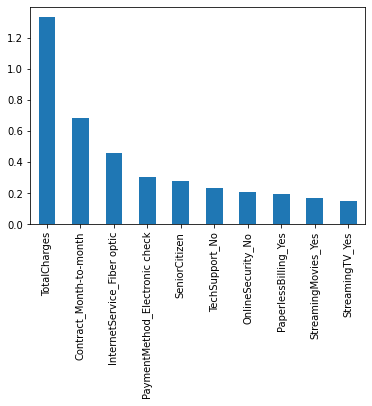

In [45]:
# To get the weight of all variables
weights = pd.Series(lr.coef_[0],
                 index=X_telecom_cust.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


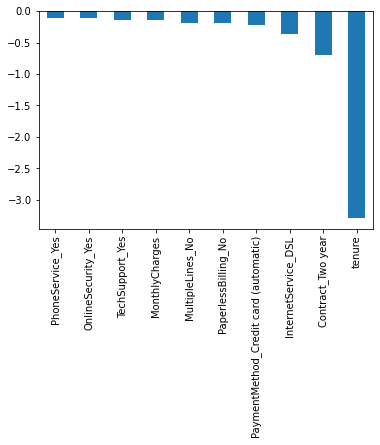

In [46]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Observations:**

We can see that some variables have a positive relation to Churn, while some have negative relation. Negative relation means that Churn tends to decrease with that variable.

*   We can see that in plotting distribution of tenure and contract, two year contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
*   Having DSL internet service also reduces the pobability of Churn
*   Total charges, month-to-month contract and fibre optic internet services can lead to higher churn rates. This's interesting because even if fiber optic service is faster, customers are likely to churn.





## Linear Support Vector Machines

In [47]:
from sklearn.svm import LinearSVC

svc = LinearSVC().fit(X_train, y_train)

print("Accuracy of Linear Support Vector Machines on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy of Linear Support Vector Machines on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy of Linear Support Vector Machines on training set: 0.758
Accuracy of Linear Support Vector Machines on test set: 0.770


### SVC with scaling

In [48]:
svc = LinearSVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy of Linear Support Vector Machines on training set (with scaling): {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy of Linear Support Vector Machines on test set (with scaling): {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy of Linear Support Vector Machines on training set (with scaling): 0.804
Accuracy of Linear Support Vector Machines on test set (with scaling): 0.810


### SVC with GridSearchCV

In [49]:
# Check the list of available parameters
svc.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [50]:
svc_param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  "penalty": ['l1','l2']}  
svc_cv = GridSearchCV(LinearSVC(), svc_param_grid, cv=5)
svc_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [51]:
print("Best parameters: {}".format(svc_cv.best_params_))
print("Best cross-validation score: {:.3f}".format(svc_cv.best_score_))

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.801


In [52]:
print("Accuracy of Linear Support Vector Machines on test set (with tuning): {:.3f}".format(svc_cv.score(X_test_scaled, y_test)))

Accuracy of Linear Support Vector Machines on test set (with tuning): 0.805


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

print("Accuracy of Random Forest Classifier on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of Random Forest Classifier on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.998
Accuracy of Random Forest Classifier on test set: 0.796


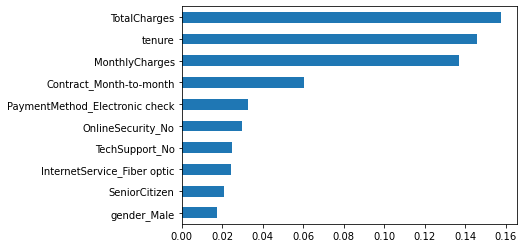

In [54]:
importances = forest.feature_importances_
weights = pd.Series(importances,
                 index=X_telecom_cust.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**


*   From the random forest algorithm, total charges, tenure, and monthly charges are the most important features to predict churn, the results are very similar to logistic regression and from we visualization. 



## PCA

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_telecom_cust)
X_telecom_cust_scaled = scaler.transform(X_telecom_cust)

# Keep the first three principal components of the data
pca = PCA(n_components = 3, random_state = 0)
pca.fit(X_telecom_cust_scaled)
X_telecom_cust_pca = pca.transform(X_telecom_cust_scaled)

print("Original shape: {}".format(str(X_telecom_cust_scaled.shape)))
print("Reduced shape: {}".format(str(X_telecom_cust_pca.shape)))

Original shape: (7032, 45)
Reduced shape: (7032, 3)


In [56]:
print("Principal components: \n", pca.components_.T)

Principal components: 
 [[-7.25150328e-02 -2.12702818e-02 -9.76436058e-02]
 [-1.98586987e-02  3.32231274e-01  3.00290364e-02]
 [-2.42596541e-01  1.36060363e-01 -2.00339816e-01]
 [-1.25278669e-01  3.20591564e-01 -6.46008207e-02]
 [-2.38298576e-03  4.11181031e-03 -9.39508206e-03]
 [ 2.38298576e-03 -4.11181031e-03  9.39508206e-03]
 [-3.40979375e-04 -2.15570770e-01 -4.19135518e-02]
 [ 3.40979375e-04  2.15570770e-01  4.19135518e-02]
 [-5.62926195e-02 -1.40387056e-01 -1.02141049e-01]
 [ 5.62926195e-02  1.40387056e-01  1.02141049e-01]
 [-4.49349055e-02 -4.37656849e-02  3.95676600e-01]
 [ 4.49349055e-02  4.37656849e-02 -3.95676600e-01]
 [ 1.15639947e-01 -1.28967753e-01 -4.88891167e-02]
 [-4.49349055e-02 -4.37656849e-02  3.95676600e-01]
 [-9.01038162e-02  1.56669743e-01 -1.87326875e-01]
 [-8.08534437e-02 -1.81682376e-02  3.64631798e-01]
 [-1.64735266e-01  9.21851705e-03 -3.05479380e-01]
 [ 2.91955916e-01  9.84363642e-03 -5.22756088e-02]
 [-1.63368017e-01 -1.56280748e-01 -9.06909767e-02]
 [ 2.91

In [57]:
exp_var = pca.explained_variance_ratio_

print("Total variation explained: {0} = {1:.2f}%".format(exp_var, sum(pca.explained_variance_ratio_*100)))

Total variation explained: [0.25212342 0.13517441 0.09429404] = 48.16%


In [58]:
print("Variance of 1st principal component: {:.3f}%".format(pca.explained_variance_ratio_[0]*100))

Variance of 1st principal component: 25.212%


Text(0, 0.5, 'Principal components')

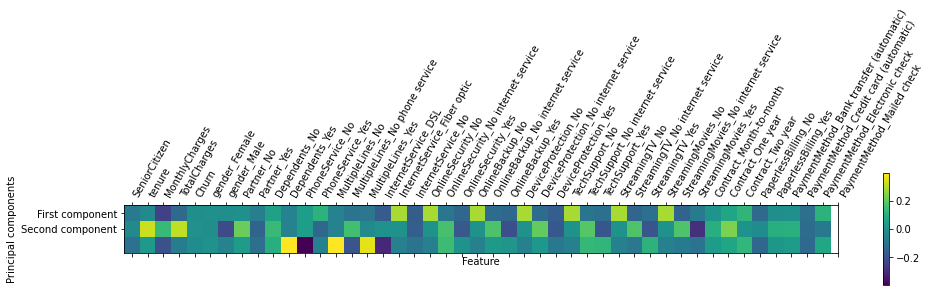

In [59]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(telecom_cust_dummies.columns.values)),
           telecom_cust_dummies.columns.values, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Clustering - การจัดกลุ่มลูกค้าที่ใช้บริการ

### Clustering KMean Without PCA for detect Customer Churn Segment 

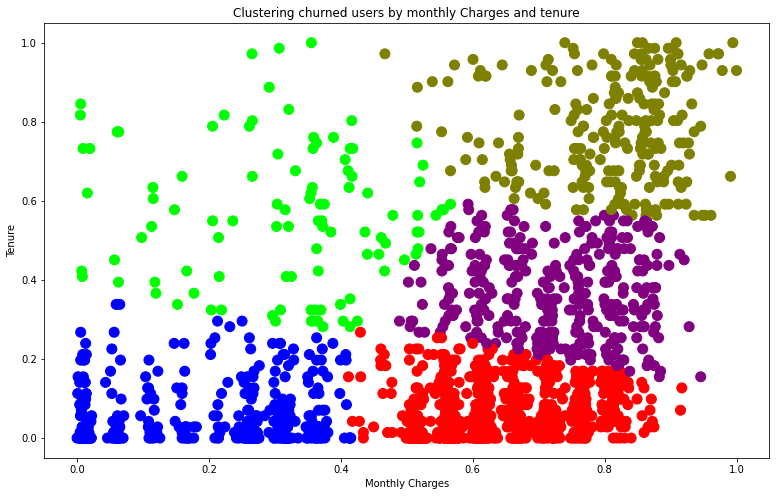

In [60]:
from sklearn.cluster import KMeans 

monthlyp_and_tenure = telecom_cust[['MonthlyCharges', 'tenure']][telecom_cust.Churn == 1]

scaler = MinMaxScaler()
monthly_and_tenure_standardized = pd.DataFrame(scaler.fit_transform(monthlyp_and_tenure) )
monthly_and_tenure_standardized.columns = ['MonthlyCharges', 'tenure']

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(monthly_and_tenure_standardized)

monthly_and_tenure_standardized['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(13, 8))
plt.scatter(monthly_and_tenure_standardized['MonthlyCharges'], monthly_and_tenure_standardized['tenure'],
           c = monthly_and_tenure_standardized['cluster'], cmap = 'brg', s=100)

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()

### KMeans

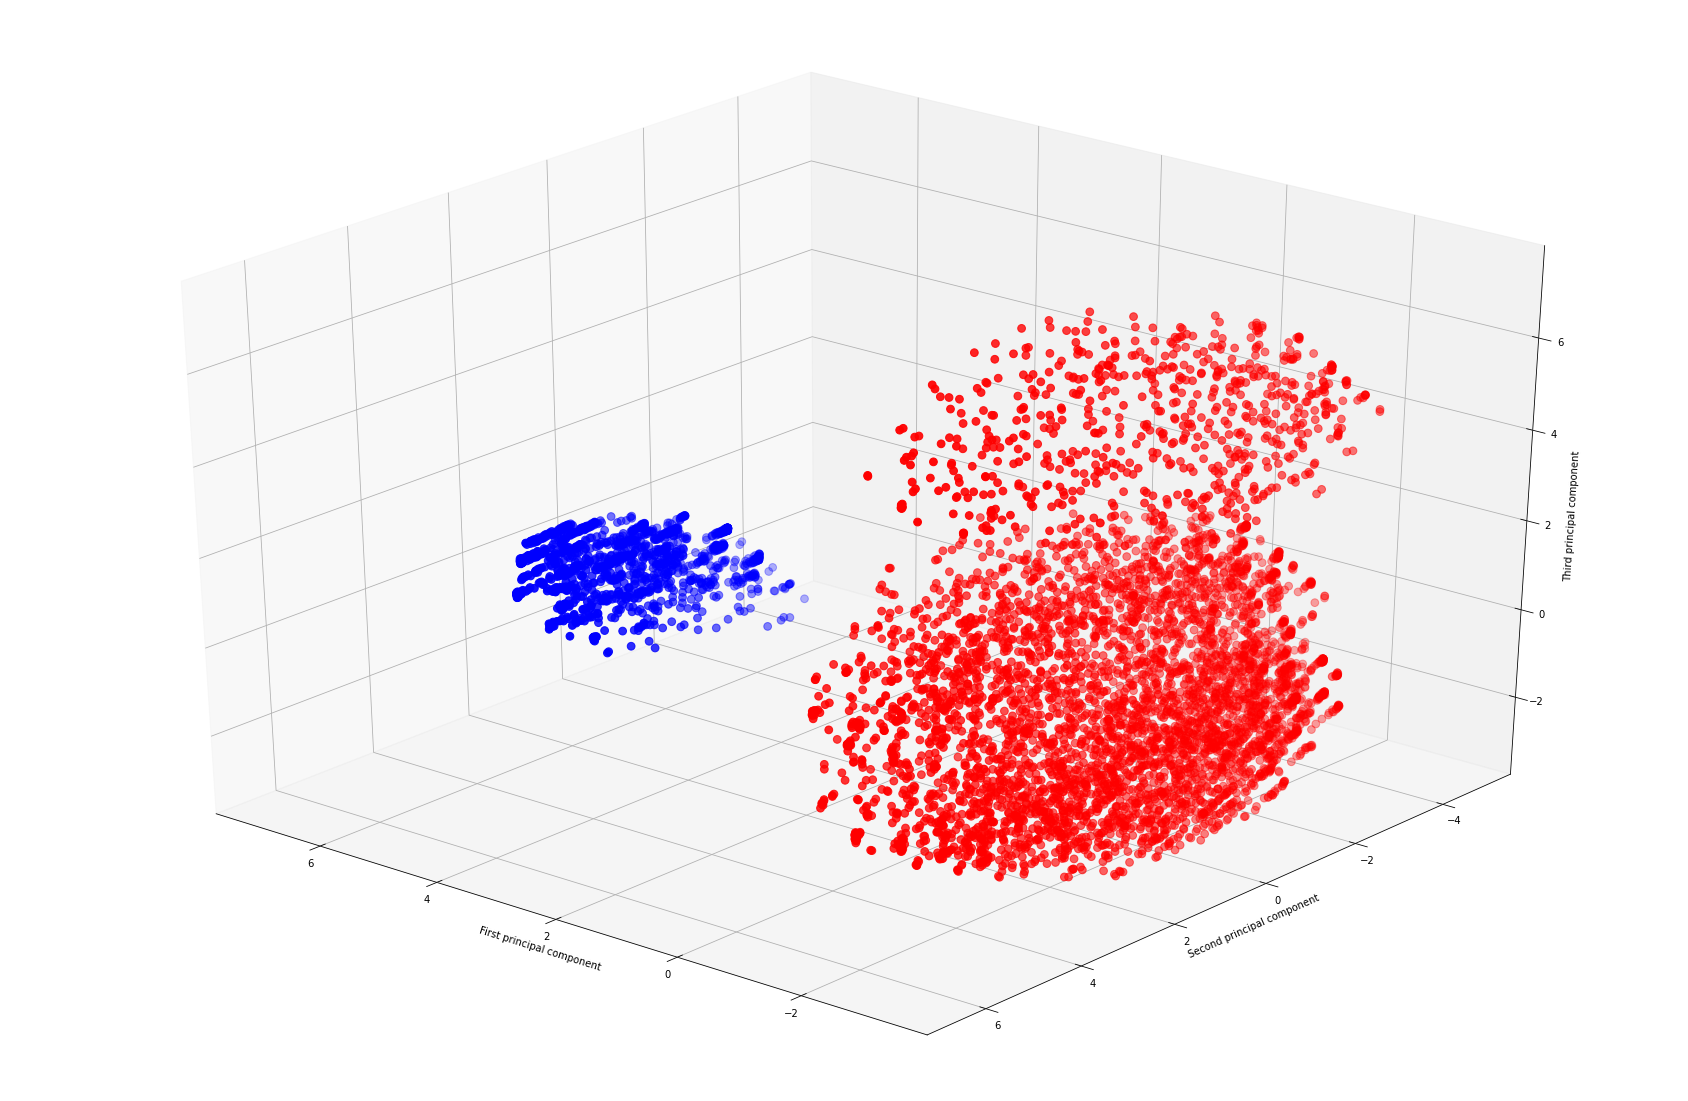

In [61]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(X_telecom_cust_pca)
X_telecom_cust_pca = pd.DataFrame(X_telecom_cust_pca)
                                  
X_telecom_cust_pca["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label == 0], X_telecom_cust_pca[1][X_telecom_cust_pca.label == 0], X_telecom_cust_pca[2][X_telecom_cust_pca.label == 0], c='blue', s=60)
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label == 1], X_telecom_cust_pca[1][X_telecom_cust_pca.label == 1], X_telecom_cust_pca[2][X_telecom_cust_pca.label == 1], c='red', s=60)
#ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label == 2], X_telecom_cust_pca[1][X_telecom_cust_pca.label == 2], X_telecom_cust_pca[2][X_telecom_cust_pca.label == 2], c='green', s=60)

ax.view_init(30, 130)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
ax.set_zlabel('Third principal component')
plt.show()

### DBScan

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
for eps in[1,3,5,7,9,11,13]:
  print("\neps={}".format(eps))
  dbscan = DBSCAN(eps=eps, min_samples=40)
  labels = dbscan.fit_predict(X_telecom_cust_pca)
  print("Clusters present: {}".format(np.unique(labels)))
  print("Clusters sizes : {}".format(np.bincount(labels+1)))


eps=1
Clusters present: [-1  0  1  2]
Clusters sizes : [   3  677 4832 1520]

eps=3
Clusters present: [0 1]
Clusters sizes : [   0 5512 1520]

eps=5
Clusters present: [0 1]
Clusters sizes : [   0 5512 1520]

eps=7
Clusters present: [0]
Clusters sizes : [   0 7032]

eps=9
Clusters present: [0]
Clusters sizes : [   0 7032]

eps=11
Clusters present: [0]
Clusters sizes : [   0 7032]

eps=13
Clusters present: [0]
Clusters sizes : [   0 7032]


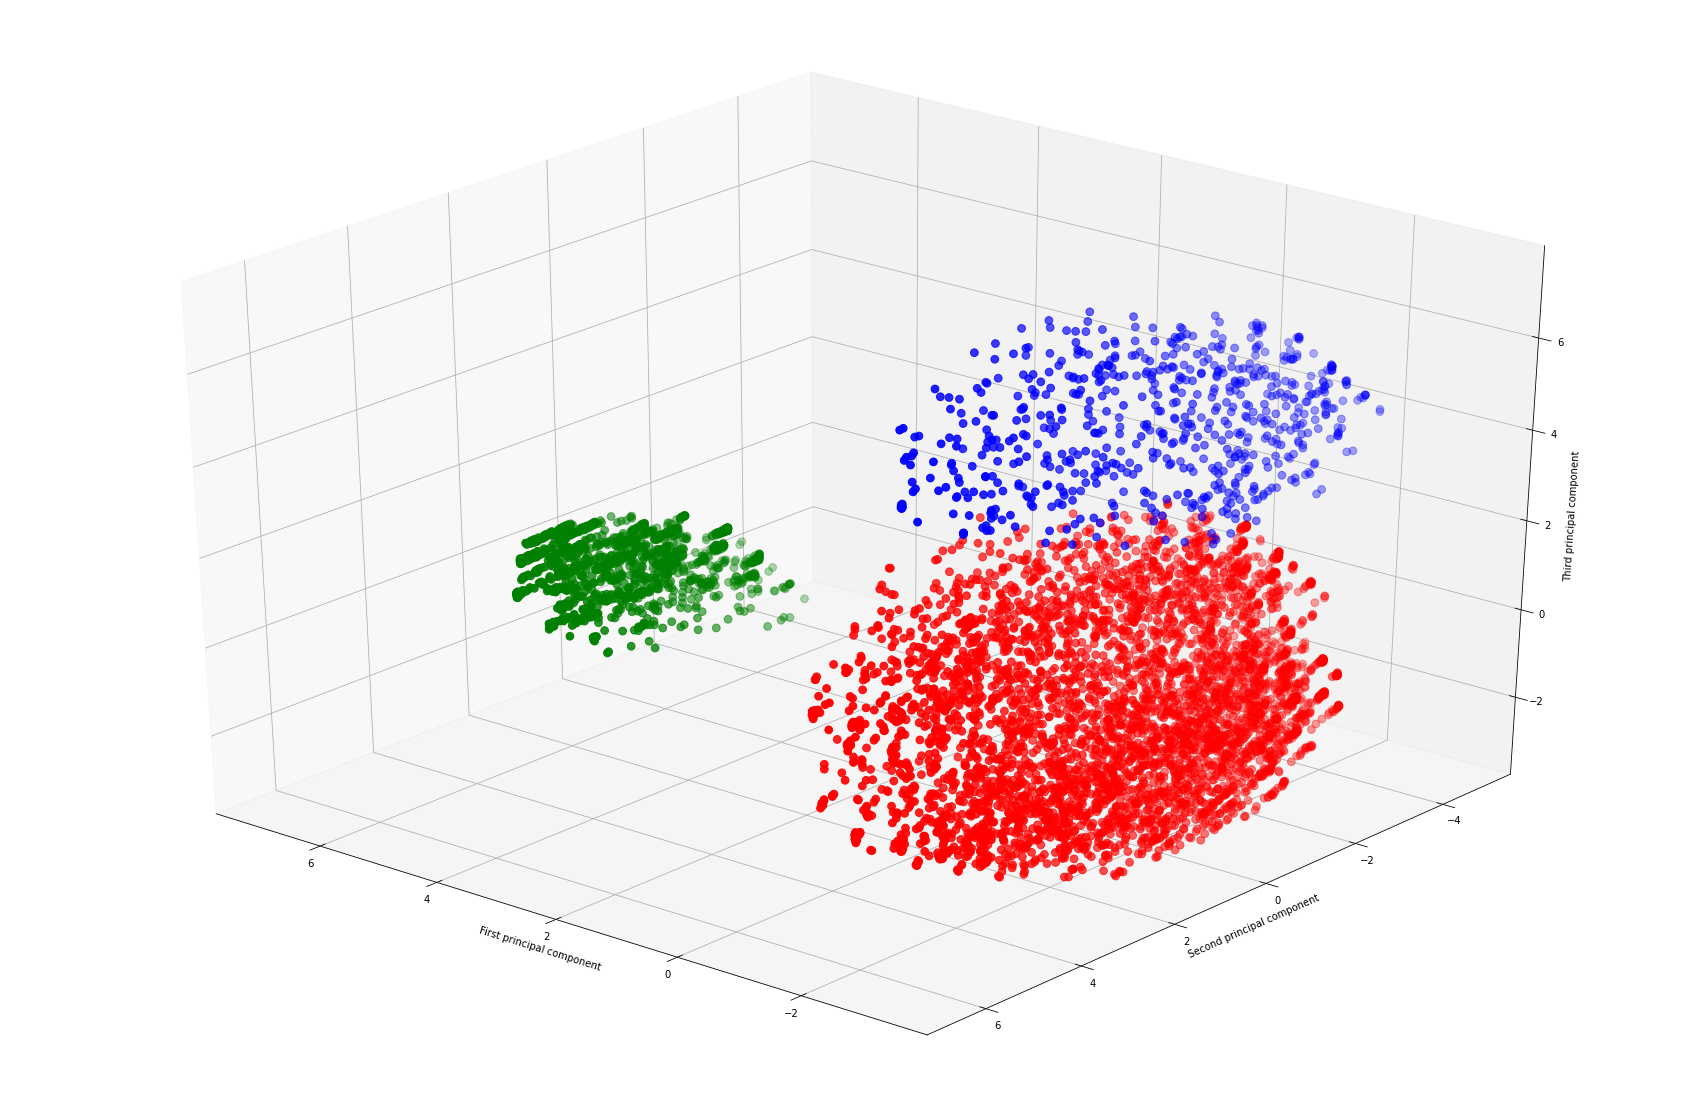

In [64]:
dbscan = DBSCAN(eps=1, min_samples=40)
labels = dbscan.fit_predict(X_telecom_cust_pca)
                                  
X_telecom_cust_pca["label_db"] = labels
 
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label_db == 0], X_telecom_cust_pca[1][X_telecom_cust_pca.label_db == 0], X_telecom_cust_pca[2][X_telecom_cust_pca.label_db == 0], c='blue', s=60)
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label_db == 1], X_telecom_cust_pca[1][X_telecom_cust_pca.label_db == 1], X_telecom_cust_pca[2][X_telecom_cust_pca.label_db == 1], c='red', s=60)
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label_db == 2], X_telecom_cust_pca[1][X_telecom_cust_pca.label_db == 2], X_telecom_cust_pca[2][X_telecom_cust_pca.label_db == 2], c='green', s=60)

ax.view_init(30, 130)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
ax.set_zlabel('Third principal component')
plt.show()


### PCA with Actual

In [65]:
X_telecom_cust_pca["label_Real"] = y_telecom_cust

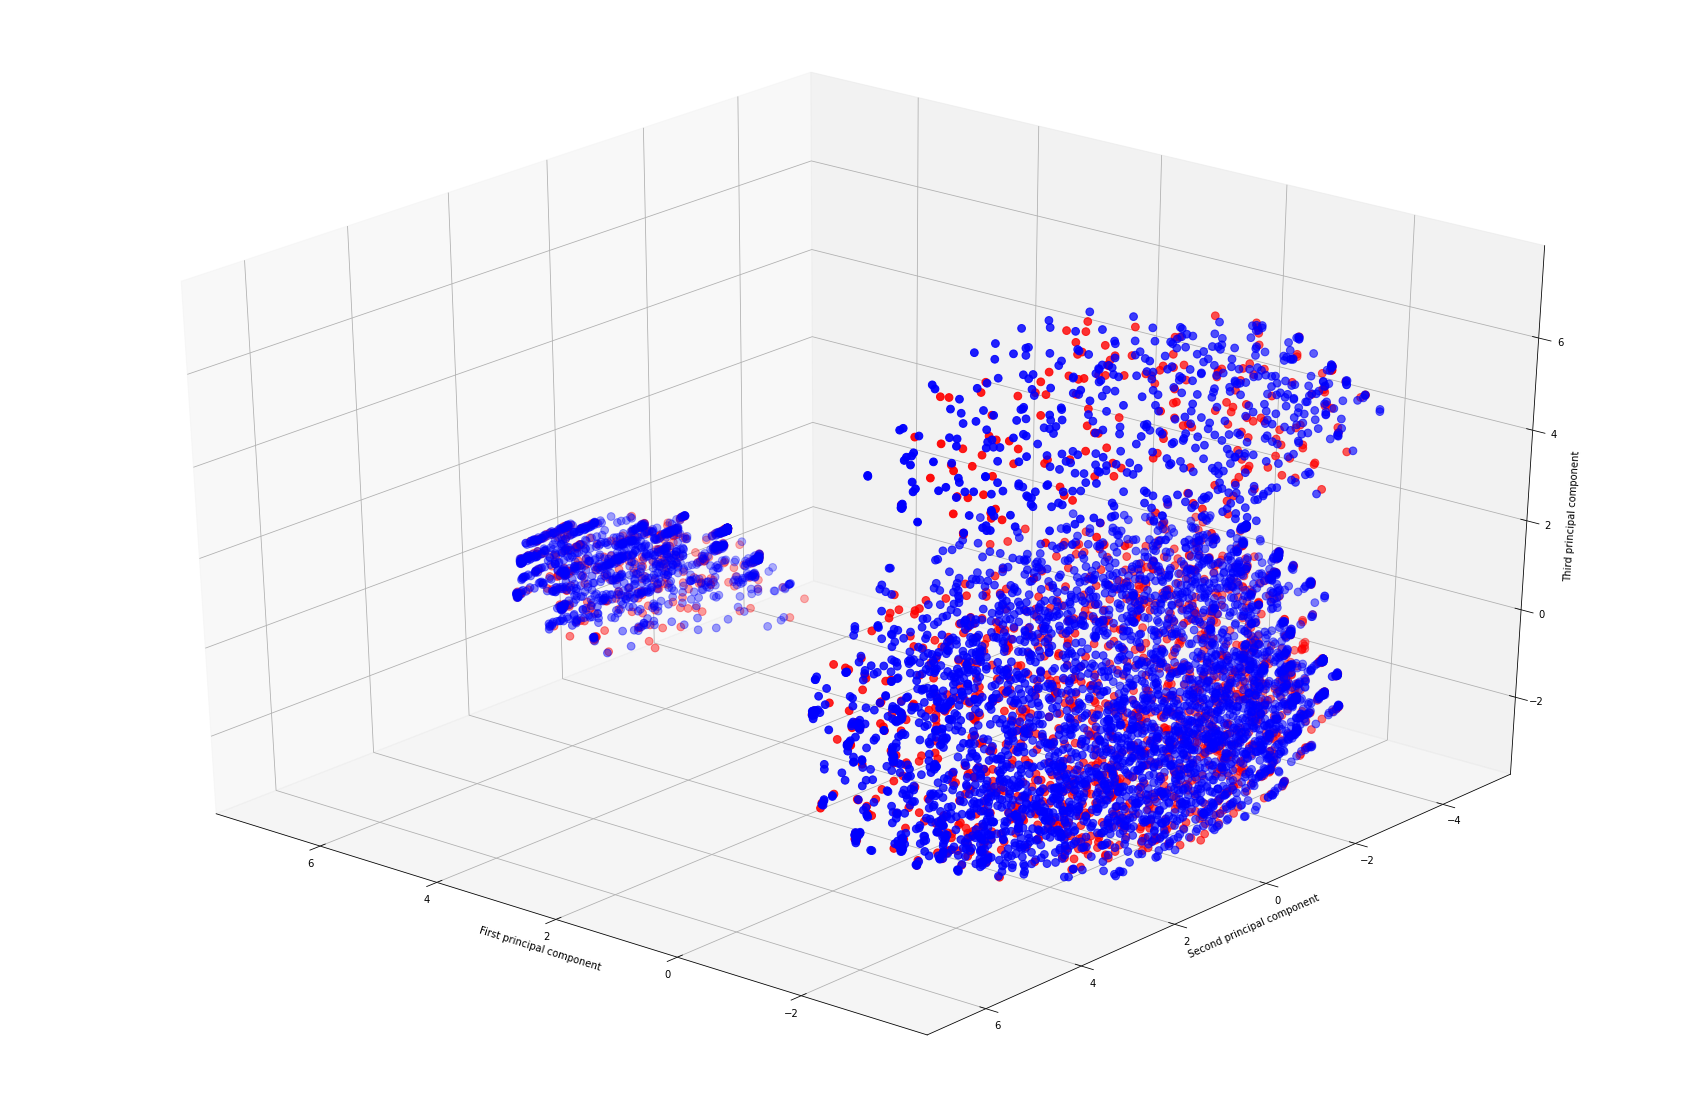

In [66]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label_Real == 0], X_telecom_cust_pca[1][X_telecom_cust_pca.label_Real == 0], X_telecom_cust_pca[2][X_telecom_cust_pca.label_Real == 0], c='blue', s=60)
ax.scatter(X_telecom_cust_pca[0][X_telecom_cust_pca.label_Real == 1], X_telecom_cust_pca[1][X_telecom_cust_pca.label_Real == 1], X_telecom_cust_pca[2][X_telecom_cust_pca.label_Real == 1], c='red', s=60)


ax.view_init(30, 130)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
ax.set_zlabel('Third principal component')
plt.show()

# **Evaluation:**

In [67]:
# Make predictions on test dataset
lr_predictions = lr.predict(X_test_scaled)
svc_predictions = svc.predict(X_test_scaled)
forest_predictions = forest.predict(X_test_scaled)

In [68]:
# Evaluate predictions
print("Logistic Regression accuracy score: {:.3f}".format(accuracy_score(y_test, lr_predictions)))
print("Linear Support Vector Machines accuracy score: {:.3f}".format(accuracy_score(y_test, svc_predictions)))
print("Random Forest accuracy score: {:.3f}".format(accuracy_score(y_test, forest_predictions)))

Logistic Regression accuracy score: 0.811
Linear Support Vector Machines accuracy score: 0.810
Random Forest accuracy score: 0.730


In [69]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[1182  129]
 [ 204  243]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.54      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



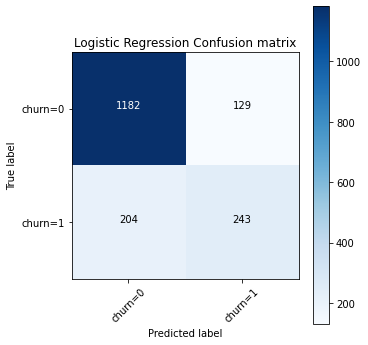

In [70]:
plt.figure(figsize = (5, 5))
plot_confusion_matrix(confusion_matrix(y_test, lr_predictions), classes=['churn=0', 'churn=1'], normalize= False,  title='Logistic Regression Confusion matrix')
print(classification_report(y_test, lr_predictions))

Confusion matrix
[[1183  128]
 [ 206  241]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.54      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



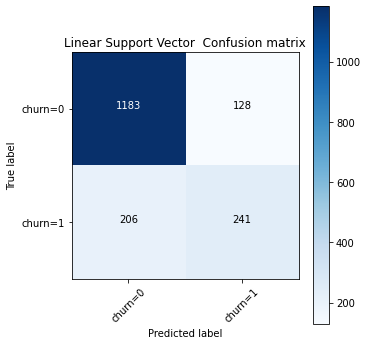

In [71]:
plt.figure(figsize = (5, 5))
plot_confusion_matrix(confusion_matrix(y_test, svc_predictions), classes=['churn=0', 'churn=1'], normalize= False,  title='Linear Support Vector  Confusion matrix')
print(classification_report(y_test, svc_predictions))

Confusion matrix
[[971 340]
 [134 313]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1311
           1       0.48      0.70      0.57       447

    accuracy                           0.73      1758
   macro avg       0.68      0.72      0.69      1758
weighted avg       0.78      0.73      0.74      1758



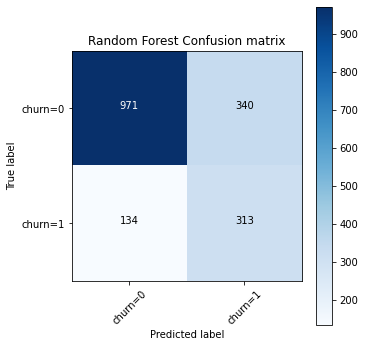

In [72]:
plt.figure(figsize = (5, 5))
plot_confusion_matrix(confusion_matrix(y_test, forest_predictions), classes=['churn=0', 'churn=1'], normalize= False,  title='Random Forest Confusion matrix')
print(classification_report(y_test, forest_predictions))